In [1]:
import sys
sys.path.append("../src")

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib notebook

# Load dataset and do some preprocessing

In [3]:
train_path = "../data/train.csv"

In [4]:
df_data = pd.read_csv(train_path, sep=",")

In [5]:
df_features = df_data[df_data.columns.difference(['full_label', 'label'])]
df_labels = df_data["label"]

## Set X (y) matrix(vector)

In [6]:
X = df_features.values
print(X.shape)

(29, 15104)


In [7]:
y = df_labels.values
print(y.shape)

(29,)


# Logistic regression

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21, 15104)
(21,)
(8, 15104)
(8,)


## Define the models

In [10]:
clf_l1_LR = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, multi_class='multinomial')
clf_l2_LR = LogisticRegression(penalty='l2', solver='saga', max_iter=1000, multi_class='multinomial')

## Train models

In [11]:
clf_l1_LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
clf_l2_LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

## Test models

In [13]:
predictions_l1 = clf_l1_LR.predict(X_test)
predictions_l2 = clf_l2_LR.predict(X_test)

In [14]:
score_l1 = clf_l1_LR.score(X_test, y_test)
print(score_l1)

0.5


In [15]:
score_l2 = clf_l2_LR.score(X_test, y_test)
print(score_l1)

0.5


## Confusion matrix

In [16]:
cm_l1 = metrics.confusion_matrix(y_test, predictions_l1)
print(cm_l1)

[[0 1 0]
 [0 2 0]
 [3 0 2]]


In [17]:
cm_l2 = metrics.confusion_matrix(y_test, predictions_l2)
print(cm_l2)

[[0 1 0]
 [0 2 0]
 [3 0 2]]


## Probabilities

In [18]:
clf_l1_LR.predict_proba(X_test)

array([[0.20059094, 0.48228393, 0.31712514],
       [0.3956493 , 0.13396333, 0.47038738],
       [0.40638828, 0.14122511, 0.45238662],
       [0.04289693, 0.86862957, 0.0884735 ],
       [0.17816432, 0.5285068 , 0.29332888],
       [0.65810027, 0.16405058, 0.17784915],
       [0.40416983, 0.30161129, 0.29421888],
       [0.73306093, 0.10618686, 0.16075221]])

# Validation with KFold

In [24]:
n_splits = 5
min_iter = 0
max_iter = 4
kfold_accuracy_l1 = []
kfold_f1_l1 = []
kfold_accuracy_l2 = []
kfold_f1_l2 = []

for k_C in range(min_iter,max_iter+1):
    kf = KFold(n_splits=n_splits)
    accuracy_l1 = []
    f1_l1 = []
    accuracy_l2 = []
    f1_l2 = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Trainning
        clf_l1_LR = LogisticRegression(penalty='l1', solver='saga', max_iter=10000, multi_class='multinomial', C=10**-k_C)
        clf_l2_LR = LogisticRegression(penalty='l2', solver='saga', max_iter=10000, multi_class='multinomial', C=10**-k_C)
        
        clf_l1_LR.fit(X_train, y_train)
        clf_l2_LR.fit(X_train, y_train)

        #Accuraccy and F1 score
        y_predict_l1 = clf_l1_LR.predict(X_test)
        accuracy_l1.append(clf_l2_LR.score(X_test, y_test))
        f1_l1.append(f1_score(y_test, y_predict_l1, average='micro'))

        y_predict_l2 = clf_l1_LR.predict(X_test)
        accuracy_l2.append(clf_l2_LR.score(X_test, y_test))
        f1_l2.append(f1_score(y_test, y_predict_l2, average='micro'))
        
    kfold_accuracy_l1.append(np.mean(accuracy_l1))
    kfold_f1_l1.append(np.mean(f1_l1))
    kfold_accuracy_l2.append(np.mean(accuracy_l2))
    kfold_f1_l2.append(np.mean(f1_l2))
        

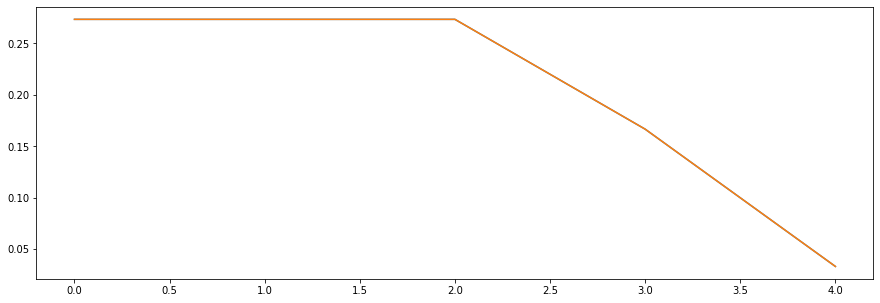

In [25]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(min_iter,max_iter+1,1), kfold_accuracy_l1)
plt.plot(np.arange(min_iter,max_iter+1,1), kfold_accuracy_l2)
plt.show()

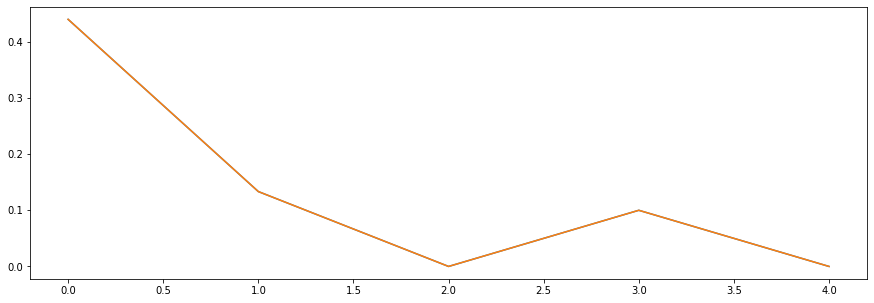

In [26]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(min_iter,max_iter+1,1), kfold_f1_l1)
plt.plot(np.arange(min_iter,max_iter+1,1), kfold_f1_l2)
plt.show()

# Logisitc regression with selected features

In [27]:
selected_data = pd.read_csv("../data/selected_train.csv", sep=",")

In [28]:
df_features_selected = selected_data[selected_data.columns.difference(['label'])]
df_labels_selected = selected_data["label"]

In [29]:
X_selected = df_features_selected.values
print(X_selected.shape)

y_selected = df_labels.values
print(y_selected.shape)

(29, 56)
(29,)


# Validation with KFold

In [41]:
n_splits = 5
min_iter = 2
max_iter = 6
kfold_accuracy_l1_s = []
kfold_f1_l1_s = []
kfold_accuracy_l2_s = []
kfold_f1_l2_s = []

for k in range(min_iter,max_iter+1):
    kf = KFold(n_splits=n_splits)
    accuracy_l1 = []
    f1_l1 = []
    accuracy_l2 = []
    f1_l2 = []
    
    for train_index, test_index in kf.split(X_selected):
        X_train, X_test = X_selected[train_index], X_selected[test_index]
        y_train, y_test = y_selected[train_index], y_selected[test_index]

        # Trainning
        clf_l1_LR = LogisticRegression(penalty='l1', solver='saga', max_iter=10**k, multi_class='multinomial', C=1)
        clf_l2_LR = LogisticRegression(penalty='l2', solver='saga', max_iter=10**k, multi_class='multinomial', C=1)
        
        clf_l1_LR.fit(X_train, y_train)
        clf_l2_LR.fit(X_train, y_train)

        #Accuraccy and F1 score
        y_predict_l1 = clf_l1_LR.predict(X_test)
        accuracy_l1.append(clf_l2_LR.score(X_test, y_test))
        f1_l1.append(f1_score(y_test, y_predict_l1, average='micro'))

        y_predict_l2 = clf_l1_LR.predict(X_test)
        accuracy_l2.append(clf_l2_LR.score(X_test, y_test))
        f1_l2.append(f1_score(y_test, y_predict_l2, average='micro'))
        
    kfold_accuracy_l1_s.append(np.mean(accuracy_l1))
    kfold_f1_l1_s.append(np.mean(f1_l1))
    kfold_accuracy_l2_s.append(np.mean(accuracy_l2))
    kfold_f1_l2_s.append(np.mean(f1_l2))
        

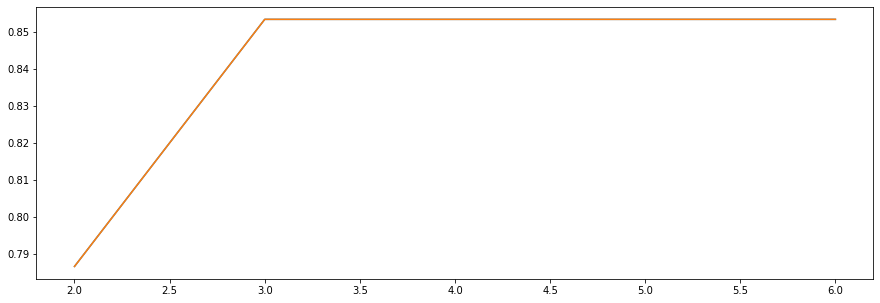

In [42]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(min_iter,max_iter+1,1), kfold_accuracy_l1_s)
plt.plot(np.arange(min_iter,max_iter+1,1), kfold_accuracy_l2_s)
plt.show()

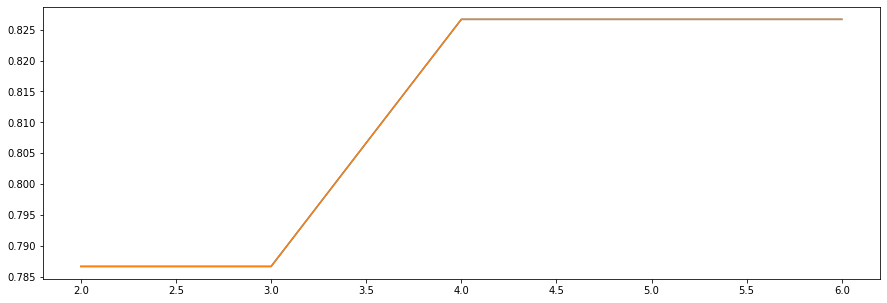

In [43]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(min_iter,max_iter+1,1), kfold_f1_l1_s)
plt.plot(np.arange(min_iter,max_iter+1,1), kfold_f1_l2_s)
plt.show()